In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras import layers

# Dataset directory
data_dir = "agri_crops/Agricultural-crops"

2025-07-19 19:05:21.933102: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-07-19 19:05:21.933663: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-19 19:05:21.936165: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-07-19 19:05:21.943117: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1752969921.955501    1253 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1752969921.95

In [4]:
data_dir = "agri_crops/Agricultural-crops"
image_size = (224, 224)
batch_size = 10

train_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="training",
    shuffle=True,
    color_mode="rgb",
    image_size=image_size,
    batch_size=batch_size,
    seed=42
)

validation_ds = keras.utils.image_dataset_from_directory(
    data_dir,
    labels="inferred",
    label_mode="int",
    validation_split=0.2,
    subset="validation",
    shuffle=True,
    color_mode="rgb",
    image_size=image_size,
    batch_size=batch_size,
    seed=42
)

class_names = train_ds.class_names

Found 759 files belonging to 30 classes.
Using 608 files for training.
Found 759 files belonging to 30 classes.
Using 151 files for validation.


2025-07-19 19:07:55.000661: E external/local_xla/xla/stream_executor/cuda/cuda_platform.cc:51] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


### **Bar plot for Class Distribution**

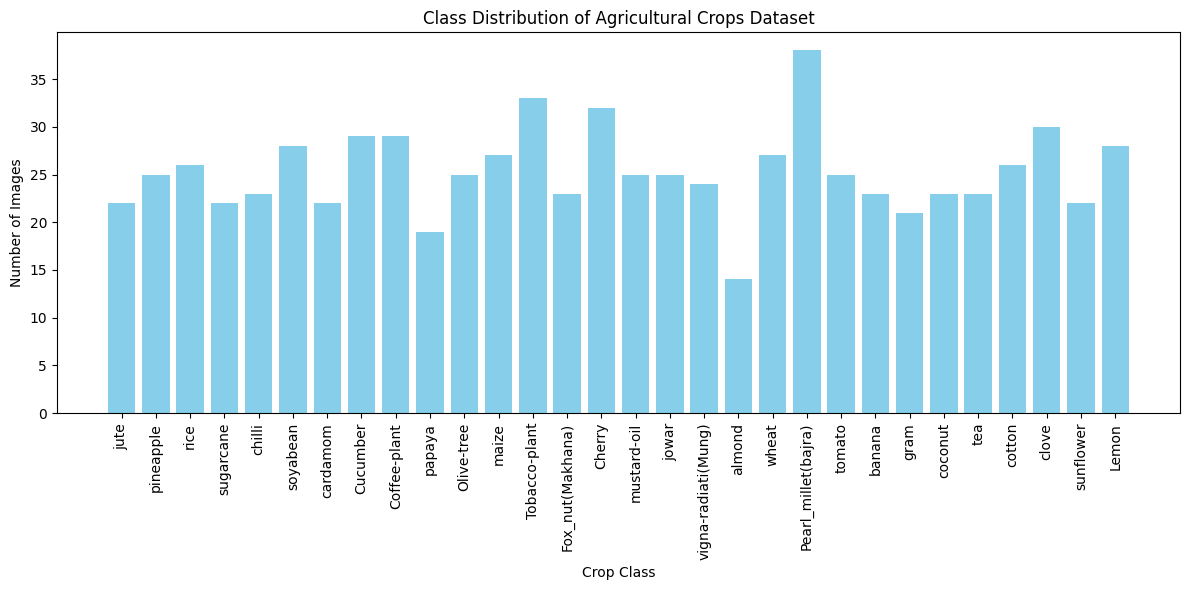

In [5]:
# Count images per class
class_counts = {
    class_name: len(os.listdir(os.path.join(data_dir, class_name)))
    for class_name in os.listdir(data_dir)
    if os.path.isdir(os.path.join(data_dir, class_name))
}

# Plot
plt.figure(figsize=(12, 6))
plt.bar(class_counts.keys(), class_counts.values(), color='skyblue')
plt.xticks(rotation=90)
plt.title('Class Distribution of Agricultural Crops Dataset')
plt.xlabel('Crop Class')
plt.ylabel('Number of Images')
plt.tight_layout()
plt.show()

### **File Images**

2025-07-19 19:08:01.270082: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


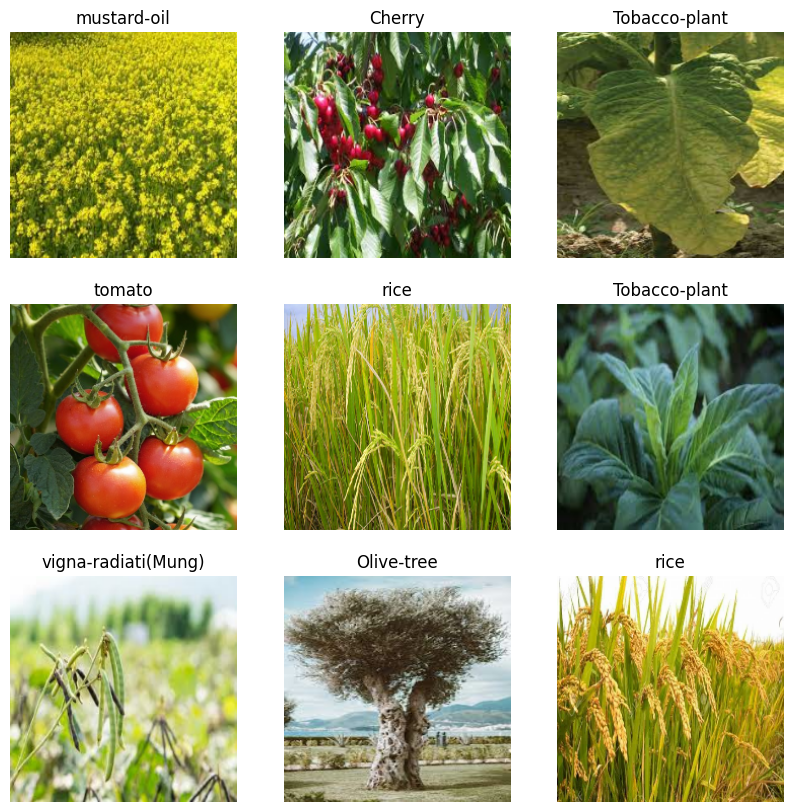

In [6]:
# Get class names from the training dataset
class_names = train_ds.class_names

# Plot the first 9 images and their labels
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):  # Take one batch
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")